In [1]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Load the diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="target")
# Split into training and testing sets
X_train, X_test, y_train, y_test =
     train_test_split(X, y, test_size=0.2, random_state=42)
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
# SHAP explanation
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)
# SHAP summary plot
shap.summary_plot(shap_values, X_test)

SyntaxError: invalid syntax (ipython-input-2319261977.py, line 13)

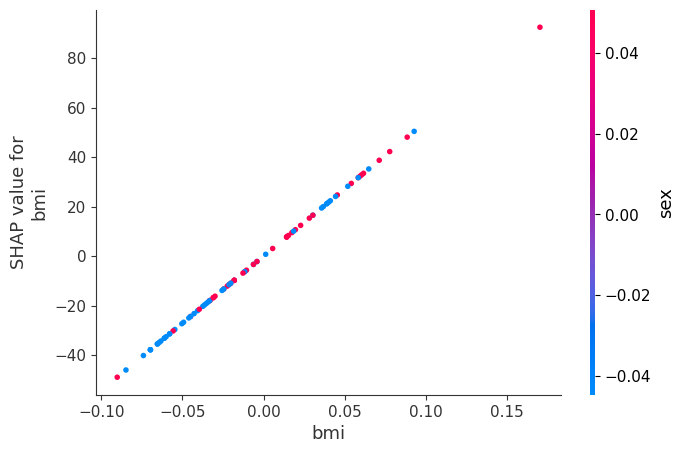

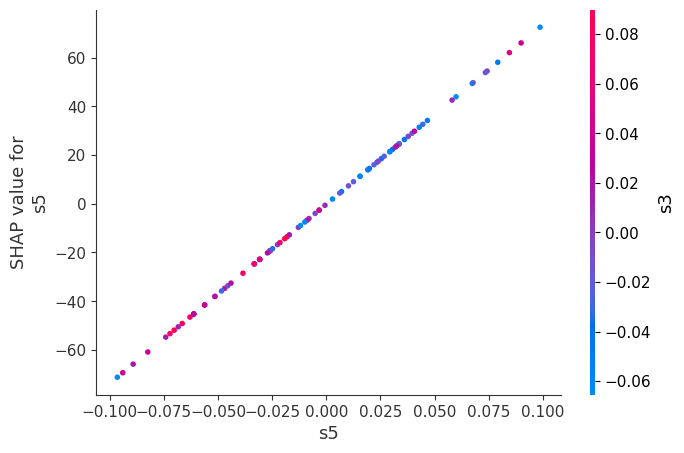

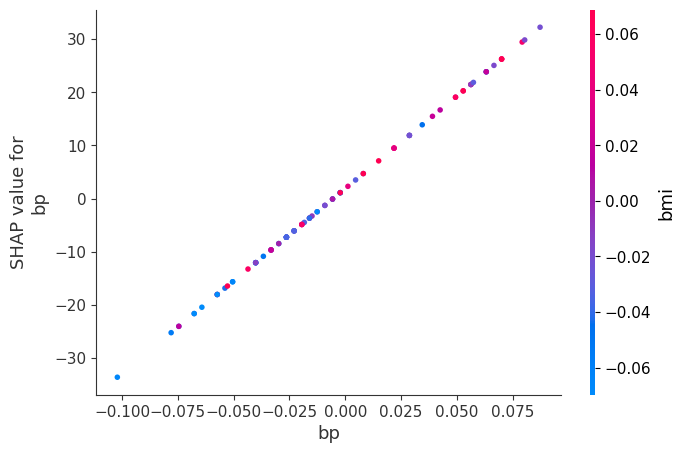

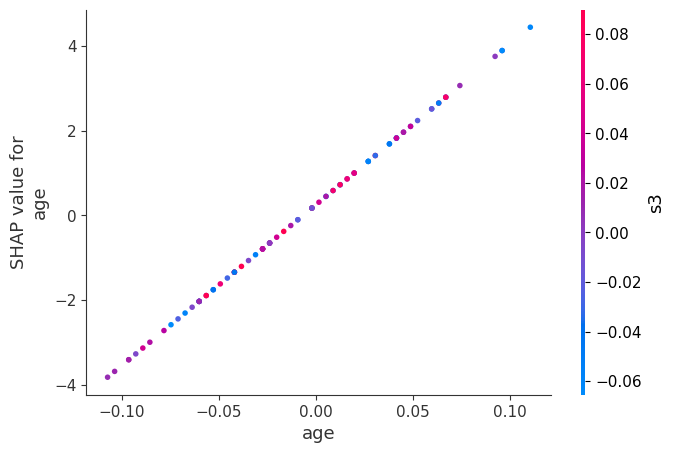

In [ ]:

# Generate SHAP dependence plots
selected_features = ['bmi', 's5', 'bp', 'age']
for feature in selected_features:
    shap.dependence_plot(feature, shap_values.values, X_test, feature_names=X_test.columns)
    plt.savefig(f"shap_dependence_{feature}.png")
    plt.close()
